data from https://data.bts.gov/Research-and-Statistics/Border-Crossings-by-Mode-Border-and-State/erjk-mneb 
personal passenger vehical counts


In [16]:
import pandas as pd
import geopandas as gpd
import shapely as shp

In [2]:
import os 

In [4]:
data_dir = os.environ.get('TRAFFICDIR')
os.listdir(data_dir)

['readme.md',
 'Border_Crossing_Entry_Data_20250207_personal_vehicles.csv',
 'Border_Crossing_Entry_Data_20250207_trucks.csv',
 'Border_Crossing_Entry_Data_20250207_bus.csv']

In [7]:
df = pd.read_csv(os.path.join(data_dir, 'Border_Crossing_Entry_Data_20250207_personal_vehicles.csv'))

In [9]:
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Latitude', 'Longitude', 'Point'],
      dtype='object')

In [12]:
df['Point'][0]

'POINT (-70.396722 45.805661)'

In [19]:
df['shp_point'] = df.apply(lambda x: shp.Point(x['Longitude'], x['Latitude']), axis=1)

In [20]:
dfg = gpd.GeoDataFrame(df, geometry='shp_point')

In [60]:
dfg['Value'].max()

4447374

<GeoAxes: >

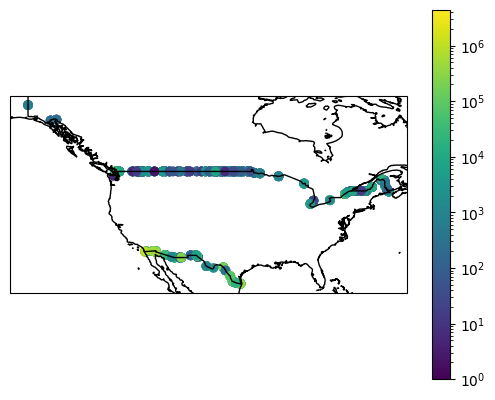

In [76]:
from matplotlib.colors import LogNorm
import cartopy 

# Set up a standard map for latlon data.
geo_axes = plt.axes(projection=cartopy.crs.PlateCarree())


norm=LogNorm(vmin=1, vmax=dfg['Value'].max())

geo_axes.add_feature(cartopy.feature.BORDERS)
geo_axes.add_feature(cartopy.feature.COASTLINE)
dfg[dfg.Date=='Jan 2024'].plot(column='Value', legend=True, norm=norm, ax=geo_axes)


normalize by port